<a href="https://colab.research.google.com/github/ccmkaaa/colab/blob/main/case/case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 20,20

# 1-ое Задание

In [2]:
url = 'https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [9]:
df[df.isna().any(axis=1)]     # проверяем, есть ли NaN-значения в таблице

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary


In [10]:
for column in df.columns:     # проверяем, какие вообще значения у нас есть в каждом столбце (вдруг какие-то аномальные)
  print(column)
  print(df[column].unique())

satisfaction_level
[0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
last_evaluation
[0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
number_project
[2 5 7 6 4 3]
average_montly_hours
[157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294 134 145

# 2-ое Задание

In [ ]:
df.describe()   # теперь можно выполнить describe() для расчета метрик

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# 3-ье Задание

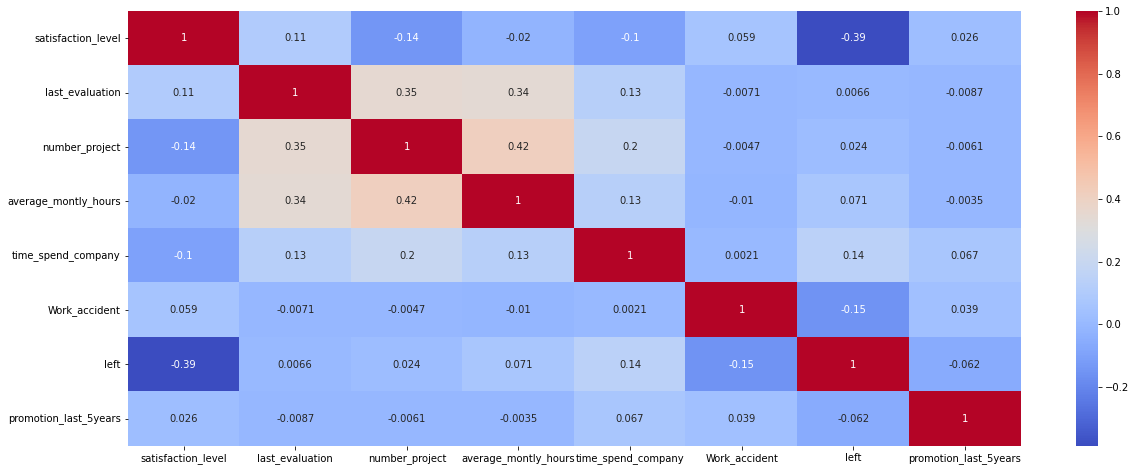

In [ ]:
sns.heatmap(df.corr(method ='pearson'), annot = True, fmt='.2g',cmap= 'coolwarm')   # посмотрим, какие вообще у нас есть корреляции
rcParams['figure.figsize'] = 20,9

# как мы видим, наиболее скорелированные столбцы: left и satisfaction_level                      | number_project и average_monthly_hours
#               наименее скорелированные столбцы: average_monthly_hours и promotion__last_5years | number_project и work_accident

# 4-ое Задание

In [ ]:
department_count_emp = df.groupby(['department'])['department'].count().reset_index(name='count').sort_values(by='count', ascending=False) # группировка по department

department_count_emp

,department,count
7,sales,4140
9,technical,2720
8,support,2229
0,IT,1227
6,product_mng,902
5,marketing,858
1,RandD,787
2,accounting,767
3,hr,739
4,management,630


# 5-ое Задание

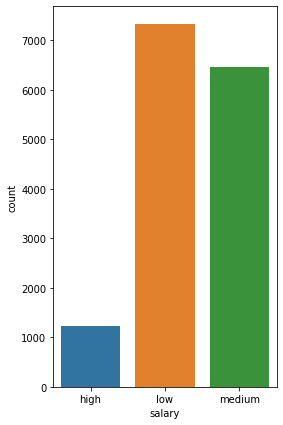

In [ ]:
salary_count_emp = df.groupby(['salary'])['salary'].count().reset_index(name='count')   # groupby по salary

rcParams['figure.figsize'] = 4,7
sns.barplot(x="salary", y="count", data=salary_count_emp)                               # распределение по зарплатам

# 6-ое Задание

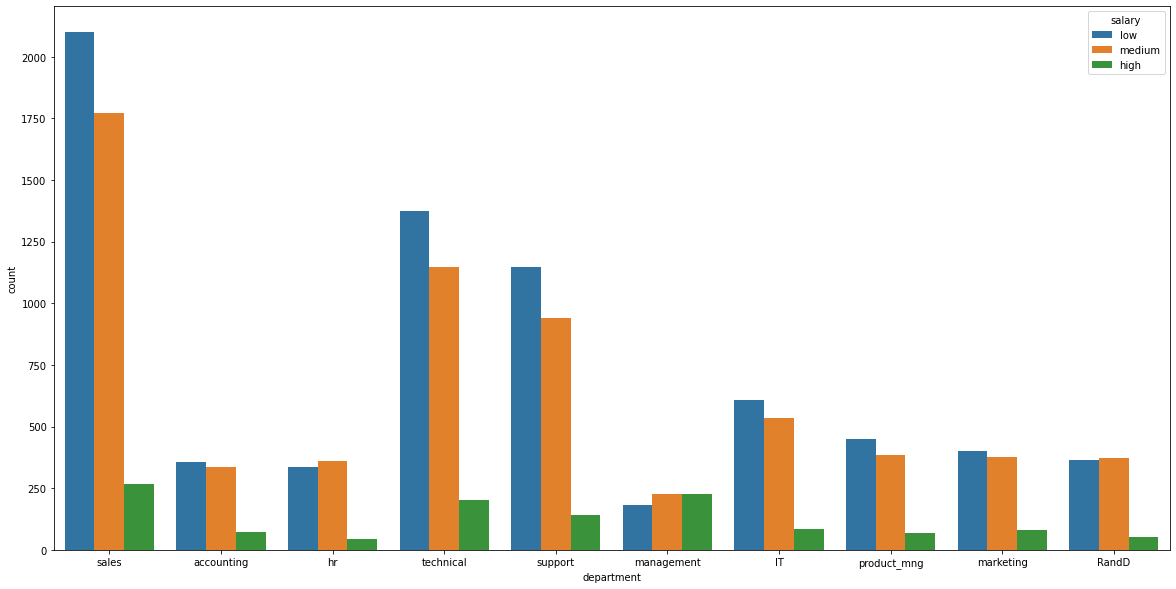

In [ ]:
salary_count_emp = df.groupby(['department', 'salary'])['salary'].count().reset_index(name='count')   # groupby по department и salary 
salary_count_emp

rcParams['figure.figsize'] = 20,10
sns.countplot(data=df,x='department',hue='salary')

# 7-ое Задание

In [ ]:
import scipy as spy
from scipy import stats

df_salary_avg_hours = df[['salary', 'average_montly_hours', 'number_project']]
df_salary_avg_hours

,salary,average_montly_hours,number_project
0,low,157,2
1,medium,262,5
2,medium,272,7
3,low,223,5
4,low,159,2
...,...,...,...
14994,low,151,2
14995,low,160,2
14996,low,143,2
14997,low,280,6


In [ ]:
def div_avg_hrs(df):                     # для большей наглядности стоит разделить кол-во часов на кол-во проектов
  return df['average_montly_hours'] / df['number_project']

In [ ]:
df_salary_avg_hours['div_average_montly_hours'] = df_salary_avg_hours.apply(div_avg_hrs, axis=1)   # применяем функцию

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_high_salary = df_salary_avg_hours[df_salary_avg_hours['salary'] == 'high']       # только с высокой зп
df_low_salary = df_salary_avg_hours[df_salary_avg_hours['salary'] == 'low']         # только с низкой зп

print('avg hours high salary:', df_high_salary['div_average_montly_hours'].mean())  # вычисляем средние значения для обеих групп
print('avg hours low salary:', df_low_salary['div_average_montly_hours'].mean())

# нет, кол-во часов не влияет на зарплату

avg hours high salary: 57.138549486083846
avg hours low salary: 57.31894705667943


# 8-ое Задание

In [ ]:
df_left = df[df['left'] == 1]    # покинули
df_still = df[df['left'] == 0]   # работают

df_left_promoted = df_left[df_left['promotion_last_5years'] == 1]
df_still_promoted = df_still[df_still['promotion_last_5years'] == 1]

print(len(df_left_promoted.index) / len(df_left.index))   # доля сотрудников с повышением за 5 лет (среди покинувших - 0,5%)
print(len(df_still_promoted.index) / len(df_still.index)) # доля сотрудников с повышением за 5 лет (среди работающих - 2,6%)

0.005320638476617194
0.026251312565628283


In [ ]:
print(df_left['satisfaction_level'].mean())    # средний уровень удовлетворенности (среди покинувших - 44%)
print(df_still['satisfaction_level'].mean())   # средний уровень удовлетворенности (среди работающих - 66%)

0.4400980117614114
0.666809590479524


In [ ]:
print(df_left['number_project'].mean())         # среднее кол-во проектов (среди покинувших - 3,85)
print(df_still['number_project'].mean())        # среднее кол-во проектов (среди работающих - 3,78)

3.8555026603192384
3.786664333216661


# 9-ое Задание

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']   # наши features
X = df[features]
Y = df['left']

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

model = LinearRegression()
model.fit(X_train, Y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [ ]:
# коэф детерминации (около 19% зависимости)
model.score(X_test, Y_test)

0.18855801233047353

In [ ]:
prediction = model.predict(X_test)           # как модель предиктит данные
prediction

array([0.38758253, 0.3555029 , 0.1936357 , ..., 0.07415092, 0.06183549,
       0.23259585])

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, roc_auc_score
print('Качество данных:')
print('ROC-AUC:', roc_auc_score(y_true=Y_test, y_score=prediction)) # площадь кривой ошибок 
print("R^2: ", r2_score(Y_test, prediction))                       # доля дисперсии Y, которая может быть объяснена X
print("MAE:", mean_absolute_error(Y_test,prediction))              # среднее значение разницы между фактическим значением и прогнозируемым. чем ниже MAE, тем лучше (отклонение)
print("RMSE:", np.sqrt(mean_squared_error(Y_test, prediction)))     # вычисляет среднее значение квадрата разницы между фактическими значениями и прогнозируемыми

Качество данных:
ROC-AUC: 0.7962563030928904
R^2 :  0.18855801233047353
MAE : 0.307450367318048
RMSE: 0.3852031203538185
